# <center>Insurance Charges Prediction - Neural Network</center>

<hr style="border: none; border-top: 1px solid #000;">

<center>
    <span>
        Created by <b>Ian Yap</b>
        &emsp;|&emsp;
        Data from <a href="https://www.kaggle.com/datasets/mirichoi0218/insurance"><b>Kaggle</b></a>
        &nbsp;
    </span>
</center>

<br>

<center>
    <span>
        <a href="https://www.linkedin.com/in/ian-yap-052870139/"><b>LinkedIn</b></a>
        &emsp;|&emsp;
        <a href="https://xiyap.github.io/"><b>Portfolio</b></a>
    </span>
</center>
    
<hr style="border: none; border-top: 1px solid #000;">


## Table of Contents

1. [Background](#Background)
2. [Feature Information](#Feature_Information)
3. [Import Libraries](#Import_Libraries)
4. [Data Loading](#Data_Loading)
5. [Feature Engineering](#Feature_Engineering)
6. [Data Preparation](#Data_Preparation)
7. [Neural Network Model](#Neural_Network_Model)
8. [Model Comparison](#Model_Comparison)
9. [Conclusion](#Conclusion)

## <a id='Background' href=#1> Background </a>

This project is a continuation of a past project which can be found [**HERE**](https://github.com/xiyap/Insurance_Charges_Regression/blob/main/Insurance%20Charges%20Prediction%20-%20EDA%20%2B%20ML%20Regression.ipynb). 

In the initial project, the the following have been performed:
1. Performed EDA to gain insights on the dataset to identify determining factors which impacts an individuals medical costs.
2. Assisted insurance agents in determining the suitable health insurance plan and premium for a customer based on their health features.
3. Aided insurance companies in developing and updating product portfolios to seamlessly align with the evolving needs of the present era.
4. Developed a predictive model which can predict the potential medical costs of a prospective policyholder.

For this project, we will attempt to improve the accuracy of the initial predictive model which utilized **traditional machine learning algorithms** by developing a model using **Neural Network**.

This model will utilize the dataset to predict the potential medical cost of policyholders. A high accuracy model is crucial for insurance companies to accurately determine the medical cost as an oversight in assessing an individuals health risk could result in financial losses from incorrect premium charges.

## <a id='Feature_Information' href=#1> Feature Information </a>

The dataset contains following info:
- **age**: Age of policyholder
- **sex**: Gender of policyholder
- **bmi**: Body mass index (BMI) of policyholder
- **children**: Number of children/dependents covered by health insurance
- **smoker**: Is the policyholder a smoker? (Yes/No)
- **region**: Region in US where the policyholder resides
- **charges**: Individual medical costs billed by health insurance

## <a id='Import_Libraries' href=#1> Import Libraries </a>

In [1]:
import tensorflow as tf
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import random

seed = 101
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

## <a id='Data_Loading' href=#1> Data Loading </a>

Load raw data from GitHub for model development.

In [3]:
df_ori = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [4]:
df = df_ori.copy()

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## <a id='Feature_Engineering' href=#1> Feature Engineering </a>

Perform data wrangling to clean the data so that it is suitable for the predictive model.

Check for any duplicated data:

In [7]:
print(f'Number of duplicated rows: {df.duplicated().sum()}')
df.drop_duplicates(inplace = True)
print(f'Number of duplicated rows after dropping: {df.duplicated().sum()}')

Number of duplicated rows: 1
Number of duplicated rows after dropping: 0


Check the shape and status of the data:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Our data has 1337 rows, 7 columns, no missing data and the data types of each attributes are correct.

## <a id='Data_Preparation' href=#1> Data Preparation </a>

Prepare the data for model development.

Transform columns:

In [9]:
df_dummy = pd.get_dummies(df)
df_dummy.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [10]:
X = df_dummy.drop('charges', axis = 1)
y = df_dummy['charges']

Split data into train, validation and test set:

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state = 101)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 101)

Normalize input data:

In [12]:
# Neural network prefers normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_X_train = scaler.fit_transform(X_train)
norm_X_val = scaler.fit_transform(X_val)
norm_X_test = scaler.fit_transform(X_test)

In [13]:
X.shape, norm_X_train.shape, norm_X_val.shape, norm_X_test.shape

((1337, 11), (1069, 11), (134, 11), (134, 11))

### <a id='Neural_Network_Model' href=#1> Neural Network Model </a>

Dense neural network for regression:

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu', input_shape = (11, )),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'linear')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-traina

In [15]:
from sklearn.metrics import r2_score

def r2_metric(y_true, y_pred):
    y_true_np = tf.reshape(y_true, [-1])
    y_pred_np = tf.reshape(y_pred, [-1])

    # Convert TensorFlow tensors to NumPy arrays using `tf.py_function`
    r2 = tf.py_function(r2_score, [y_true_np, y_pred_np], Tout=tf.float64)
    return r2

In [16]:
from tensorflow.keras.optimizers import Adam

model.compile(loss = 'mae', optimizer = Adam(learning_rate = 0.01), metrics = ['mse', 'mae', r2_metric])

In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_mae',
                                            patience = 3,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.0000001)

In [18]:
batch_size = 16
train_data = len(norm_X_train)
val_data = len(norm_X_val)
steps_per_epoch = train_data // batch_size
validation_steps = val_data // batch_size

history = model.fit(
    norm_X_train,
    y_train,
    batch_size = batch_size,
    epochs = 200,
    steps_per_epoch = steps_per_epoch,
    verbose = 0,
    validation_data = (norm_X_val, y_val),
    validation_steps = validation_steps,
    callbacks = [learning_rate_reduction]
)


Epoch 28: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.

Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.

Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.

Epoch 40: ReduceLROnPlateau reducing learning rate to 0.0003124999930150807.

Epoch 43: ReduceLROnPlateau reducing learning rate to 0.00015624999650754035.

Epoch 46: ReduceLROnPlateau reducing learning rate to 7.812499825377017e-05.

Epoch 49: ReduceLROnPlateau reducing learning rate to 3.9062499126885086e-05.

Epoch 52: ReduceLROnPlateau reducing learning rate to 1.9531249563442543e-05.

Epoch 55: ReduceLROnPlateau reducing learning rate to 9.765624781721272e-06.

Epoch 58: ReduceLROnPlateau reducing learning rate to 4.882812390860636e-06.

Epoch 61: ReduceLROnPlateau reducing learning rate to 2.441406195430318e-06.

Epoch 64: ReduceLROnPlateau reducing learning rate to 1.22070

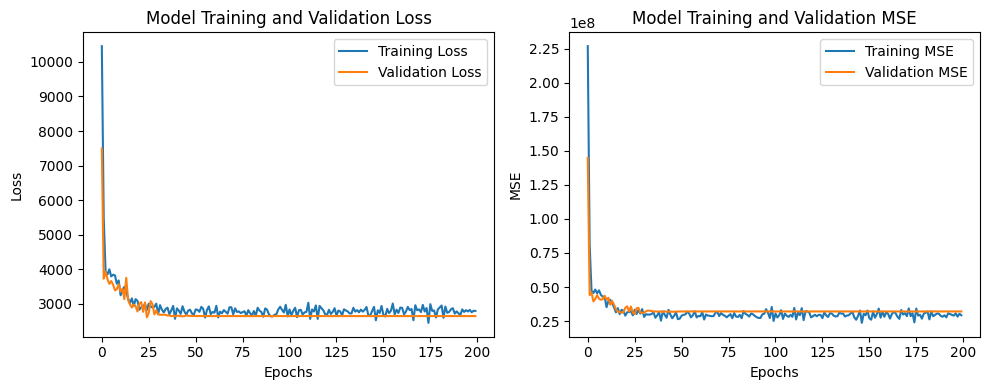

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

titles = ['Loss', 'MSE']
metrics = ['loss', 'mse']
labels = ['Training', 'Validation']

for i, (metric, title) in enumerate(zip(metrics, titles)):
#     ax = axes[i // 2, i % 2]
    ax = axes[i]
    ax.plot(history.history[metric], label = f'{labels[0]} {title}')
    ax.plot(history.history[f'val_{metric}'], label = f'{labels[1]} {title}')
    ax.set_title(f'Model Training and Validation {title}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel(title)
#     ax.set_xlim(0, 19)
#     ax.set_xticks(np.arange(0, 19, step = 1))
    ax.legend()

# fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

In [20]:
min_val_mae = min(history.history['val_loss'])
min_val_mse = min(history.history['val_mse'])
max_val_r2 = max(history.history['val_r2_metric'])
print(f'Min MAE on validation set: {min_val_mae:.3f}')
print(f'Min MSE on validation set: {min_val_mse:.3f}')
print(f'Min RMSE on validation set: {np.sqrt(min_val_mse):.3f}')
print(f'Max R2 on validation set: {max_val_r2:.3f}')
print()

results = model.evaluate(norm_X_test, y_test)
print(f'Test MAE: {round(results[0], 2)} \nTest MSE: {round(results[1], 2)} \nTest RMSE: {round(np.sqrt(results[1]), 2)} \nTest R2: {round(results[3], 2)}')

Min MAE on validation set: 2605.515
Min MSE on validation set: 30064332.000
Min RMSE on validation set: 5483.095
Max R2 on validation set: 0.758

5/5 [==============================] - 0s 6ms/step - loss: 1634.1654 - mse: 18360688.0000 - mae: 1634.1654 - r2_metric: 0.8473
Test MAE: 1634.17 
Test MSE: 18360688.0 
Test RMSE: 4284.94 
Test R2: 0.85


## <a id='Model_Comparison' href=#1> Model Comparison </a>

Comparison of error and R^2 scores for traditional machine learning algorithms and neural network:

![DS-ML Algorithm Results Image](Data/DS-ML_Algorithm_Results.JPG)

<center>
    <span>
        Neural Network: &emsp;&emsp; 
        <b>MAE:</b> 1634.17 &emsp;&emsp; 
        <b>MAPE:</b> - &emsp;&emsp; 
        <b>RMSE:</b> 4284.94 &emsp;&emsp;
        <b>R^2:</b> 0.85
    </span>
</center>

## <a id='Conclusion' href=#1> Conclusion </a>

Based on the results of this project, we can conclude that:
1. We can achieve better results for prediction models by using **deep learning** rather than traditional machine learning algorithms.
2. The **best model is the Neural Network Model**. It has a **MAE of 1634, RMSE of 4285 and R^2 of 0.85** which performs better than the extreme gradient boosting (grid_xgb) model. This means that the predictions of the neural network model will have lesser error, less susceptible to outliers and relates the features to the target the best.